---
# DATENSAMMLUNG IN TRAININGS- UND TESTDATEN AUFTEILEN

## 1. IMPORTS

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 2. LOAD DATA AS DATAFRAME

In [111]:
df = datasets.load_wine(as_frame=True)
df

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [112]:
df_wine = df.data 
df_wine.columns = ["Alkohol", "Apfelsäure", "Asche", "Aschealkalität", "Magnesium", "Phenole insgesamt", "Falvanoide", "nicht flavanoide Phenole", "Tannin", "Farbintensität", "Farbe", "OD280/OD315 des verdünnten Weins", "Prolin"]
df_wine["Klassenbezeichnung"] = df.target
df_wine

,Alkohol,Apfelsäure,Asche,Aschealkalität,Magnesium,Phenole insgesamt,Falvanoide,nicht flavanoide Phenole,Tannin,Farbintensität,Farbe,OD280/OD315 des verdünnten Weins,Prolin,Klassenbezeichnung
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


---
## 3. AUFTEILUNG DER DATEN MITTELS TRAIN TEST SPLIT VON SKLEARN

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# Zuerst X und y extrahieren 
X, y = df_wine.iloc[:, :12].values, df_wine.iloc[:,13].values
# Dann die Train_Test_Split Funktion anwenden
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state=1, test_size=.3, stratify=y) # Stratify, dass Klassenbezeichnungen exakt berücksichtigt werden
print("X_Train shape: ", X_Train.shape, "\ty_Train shape: ", y_Train.shape, "\nX_Test shape: ", X_Test.shape, "\ty_Test shape: ", y_Test.shape)
print("X_Train dim: ", X_Train.ndim, "\t\ty_Train dim: ", y_Train.ndim, "\nX_Test dim: ", X_Test.ndim, "\t\t\ty_Test dim: ", y_Test.ndim)

X_Train shape:  (124, 12) 	y_Train shape:  (124,) 
X_Test shape:  (54, 12) 	y_Test shape:  (54,)
X_Train dim:  2 		y_Train dim:  1 
X_Test dim:  2 			y_Test dim:  1


### Anzeige der `BINS` Klassenbezeichnungen

In [115]:
print("Bezeichner in y: ",     np.bincount(y), "\t --> das in %: ", )
print("Bezeichner in train: ", np.bincount(y_Train))
print("Bezeichner in test: ",  np.bincount(y_Test))

Bezeichner in y:  [59 71 48] 	 --> das in %: 
Bezeichner in train:  [41 50 33]
Bezeichner in test:  [18 21 15]


In [116]:
def describe_classDistribution(y, part: str) -> None:
    sum = np.bincount(y).sum()
    class_array = []
    for cls_idx in np.unique(y):
        bin = [np.bincount(y)][0][cls_idx]
        class_array.append(round(bin / sum, ndigits=2))
    print(f"Ausgabe der BINS für {part} in %:")
    print(class_array)

# Mittels dem SKLEARN Parameter "stratify" können wir die korrekt Aufteilung der KLassen sicherstellen --> diese Funktion liefert den Beweis
describe_classDistribution(y, "Klassen gesamt")
describe_classDistribution(y_Train, "Klassen TRAIN")
describe_classDistribution(y_Test, "Klassen TEST")

Ausgabe der BINS für Klassen gesamt in %:
[0.33, 0.4, 0.27]
Ausgabe der BINS für Klassen TRAIN in %:
[0.33, 0.4, 0.27]
Ausgabe der BINS für Klassen TEST in %:
[0.33, 0.39, 0.28]


---
# ANPASSUNG DER MERKMALE - STANDARDISIERUNG
### Die meisten Verfahren profitieren davon, wenn wir die Merkmale auf ein einheitliches Niveau bringen.<br>
### Grund ist, dass `Varianz, quadrierte Fehler` usw. von `verschieden-skalieren` oder `nicht standard-normalverteilten Daten` zu<br>
### unterschiedlichen Gewichtungen führen können und somit die Aussage verzerren oder fälschen

---
#### Es gibt zwei Konzepte, um dem entgegen zu wirken: `Normierung` = Skala auf [0,1] festlegen und `Standardisierung` = Standard-Normalverteilung mit Mittelwert = 0 und Standard-Abweichung = +1/-1
Die Normierung ist zwar ein praktisches Tool, wenn wir Werte in einem festgelegten intervall benötigen, häufig ist der Praxis aber die Standardisierung relevanter, weil bspw. Gradientenabstiegsverfahren wichtig sind für viele Optimierungsalgorithmen (Gradientenabstiegsverfahren).<br>
Viele lineare Modelle, wie das SMV, oder die logistische Regression tun sich leichter die Gewichte zu ermitteln, wenn die Merkmale in einer Standardnormalverteilung vorliegen. Außerdem haben wir mittels Standardisierung nützliche Informationen zu Ausreißern, welche bei einer Normierung<br>
auf eine Skala mit gleichen Intervallen einfach verloren gehen.

In [135]:
# Normierung auf Skale [0, 1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_Train)
X_test_norm  = mms.transform(X_Test)

In [136]:
# Standardisierung der Merkmale
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
X_Train_ssc = ssc.fit_transform(X_Train)
X_Test_ssc  = ssc.transform(X_Test)
print(X_Train_ssc)
print(X_Test_ssc)

[[ 1.75724998 -0.42418296  0.46754669 ...  1.17633597 -0.41889975
   1.17628257]
 [-0.22691937  0.87476675 -1.43090484 ... -0.70436762 -1.11989258
  -0.68867149]
 [ 0.26912297  2.4194637  -0.18960961 ...  1.21907924 -1.5580131
  -1.586093  ]
 ...
 [ 0.14511239 -0.81913388 -0.99280064 ... -0.57613783  0.98308592
   0.11059454]
 [-1.65304108 -0.38907621 -0.33564435 ... -0.76848251  0.89546181
   0.48919423]
 [-0.10290878  1.91041585  0.39452932 ...  1.11222108 -1.82088541
  -1.05324898]]
[[ 7.03160014e-01  6.46572885e-01  1.27073772e+00  1.11788200e+00
  -1.63639416e-01 -1.16936850e+00 -1.48727105e+00  1.01404052e+00
  -1.88736352e+00 -2.98306614e-01 -2.87463593e-01 -7.72804758e-01]
 [ 1.94716619e-01 -4.68066392e-01  1.38026377e+00  1.70276540e+00
   1.27492201e+00 -1.35573380e-01 -7.39150291e-01 -8.56873673e-01
  -7.20389886e-02  8.77133130e-01 -1.51420105e+00 -1.79642616e+00]
 [ 1.49682775e+00  6.73115286e-02  3.94529319e-01  9.43360335e-02
  -6.17921972e-01 -9.62609474e-01 -1.31008455

#### Es gibt zudem noch weiter Scaler wie den RobustScaler, die besonders für kleine Datenmengen nützlich sein können, die viele Ausreißer enthalten

In [137]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_Train_rbs = rbs.fit_transform(X_Train)
X_Test_rbs  = rbs.transform(X_Test)

---
# WICHTIG!!!
## Wenn wir feststellen, dass ein Modell viel besser mit den Trainingsdaten zurecht kommt, als mit den Testdaten, dann ist eine Überanpassung auf die Trainingsdaten wahrscheinlich
#### Das Modell hat eine hohe Varianz (Überanpassung) und ist nicht generalisierbar - es ist zu komplex.<br> 
<br>
Es gibt folgende Lösungsmöglichkeiten:<br>
[1] mehr Trainingsdaten sammeln -> oft nicht einfach möglich und fragwürdig, ob das überhaupt die Situation verbessern würde<br>
[2] `Regularisierung` der Straffunktion zur Kontrolle der Komplexität -> L1 und L2 Regularisierung der Straffunktion<br>
[3] Auswahl eines einfacheren Modells mit weniger Parametern<br>
[4] Dimensionsreduktion der Daten

### L2 Regularisierung ist ein Ansatz, der die Komplexität des Modells reduziert, indem er große individuelle Gewichte "bestraft" -> die Gewichte sind entsprechend weniger extrem 
### L1 Regularisierung kann als Verfahren zum Merkmalsauswahl betrachtet werden, weil wir dünn besetzte Merkmalsvektoren erhalten -> sprich die Gewichte mit wenig Information kann man vernachlässigen, ohne Informationen zu verlieren

---
## L2 Regularisierung 
### Hier anhand Summe der quadrierten Abweichungen als Straffunktion (ist symmetrisch)
Durch das hinzufügen des Regularisierungsparameter Lambda werden kleine Gewichte begünstigt (oder große bestraft), wodurch unser Modell weniger von den Trainingsdaten<br>
abhängig wird. 

---
## L1 Regularisierung begünstigtt "dünn" besetzte Vektoren
### Summe der absolut-Werte der Gewichtskoeffizienten
Durch das hinzufügen des Regularisierungsparameter Lambda werden Schnittpunkte begünstigt, die auf den Koordinaten selbst liegen -> W = 0 für das entsprechende Gewicht!<br>
Es liefert keine wertvollen Informationen und kann vernachlässigt werden.

### Bei SKLEARN Alogrithmen, die eine L1 Regulierung berücksichtigen, haben wir den `Parameter penalty='l1'` = L1 Regularisierung 

In [138]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr') # l1 = L1 - Regularisierung und wir MÜSSEN auch einen anderen optimierungsparameter als solver angeben, denn lbgfs unterstützt KEINE L1 Regularisierung


LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

## Wenden wir nun die L1 Regularisierung auf den Wein-Datensatz an

In [139]:
lr = LogisticRegression(solver='liblinear', penalty='l1', multi_class='ovr', C=1.0) # C = 1.0 ist der Standardwert --> größerer und kleinerer Wert werden die Regularisierung verstärken oder abschwächen

In [140]:
lr.fit(X_Train_ssc, y_Train)
print("Klassifikationsrate Training: ", lr.score(X_Train_ssc, y_Train))
print("Klassifikationsrate Test: ", lr.score(X_Test_ssc, y_Test))

Klassifikationsrate Training:  1.0
Klassifikationsrate Test:  0.9629629629629629


In [146]:
# Wie wir anhand des Intercept sehen können, haben wir DREI Achsenabschnitte -> für jede Klassenbezeichnung einen ==> DAS IST ALSO DAS BIAS w0
print(lr.intercept_)
print(np.unique(y_Train))

[-1.49972196 -1.23774209 -2.22667739]
[0 1 2]


#### wenn wir uns die Koeffizienten ausgeben lassen, so erhalten wir für jede Klasse (= also drei (3)) jeweils 13 Koeffizienten ausgegeben. Jede Zeile besteht aus 13 Gewichten, die mit den 13 Merkmalen der 13-dimensionalen Wein-Daten multipliziert werden, um die Netzeingabe zu berechnen

In [147]:
lr.coef_   # das sind also die Gewichtungsparameter der Schätzer

array([[ 2.4144663 ,  0.        ,  0.54059337, -2.18240748,  0.44908637,
         0.        ,  1.54310213,  0.        ,  0.        ,  0.        ,
         0.        ,  1.05029661],
       [-2.42925592, -0.32009015, -1.12370835,  1.29585806, -0.63958773,
         0.        ,  0.36994853,  0.15369289,  0.        , -1.8117042 ,
         0.90265422,  0.        ],
       [ 0.        ,  0.23198379,  0.50730174,  0.        ,  0.16142181,
         0.        , -2.4898737 , -0.11918941,  0.        ,  1.65045998,
        -0.88825925, -0.37556029]])

### INTERCEPT_ = BIAS (w0) der Funktion
### COEF_      = GEWICHTUNGSPARAMETER (wj) der Merkmale (Schätzer)

---
# Wir haben nun ein Modell trainiert, dass gegenüber irrelevanten Merkmalen in den Daten `robust` ist!
Genau geonmmen haben wir aber keine Gewichtsvektoren, die dünn besetzt sind, da sie alle von NULL verschieden sind.<br>
Wir können das aber erzwingen, indem wir die Regularisierungsstärke erhöhen = Wert von C=1.0) verringern

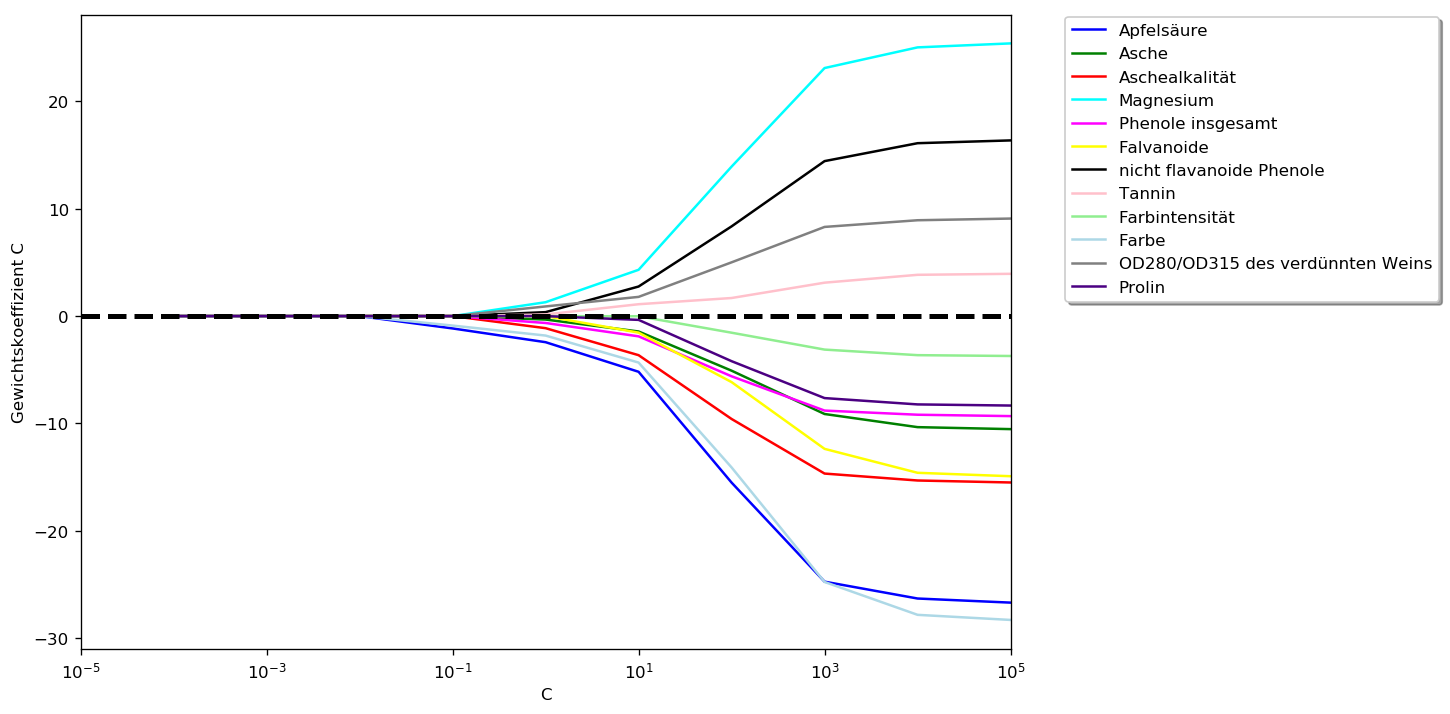

In [174]:
fig = plt.figure(figsize=(10,7), dpi=120)
ax = plt.subplot(111)
color = ["blue", "green", "red", "cyan", "magenta", "yellow", "black", "pink", "lightgreen", "lightblue", "gray", "indigo", "orange"]
weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', solver="liblinear", C=10.0**c, multi_class="ovr", random_state=0)
    lr.fit(X_Train_ssc, y_Train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), color):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color="black", ls="--", lw=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel("Gewichtskoeffizient C")
plt.xlabel("C")
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1.01), ncol=1, fancybox=True, shadow=True)
plt.show()

---
# Eine Weiter Möglichkeit zur Komplexitätsreduktion des Modells ist die Dimensionsreduktion!
Das ist insbesondere nützlich bei nicht regularisierbaren Modellen.<br>
<br>
Es gibt zwei Hauptkategorien:<br>
Die Auswahl und die Extrahierung von Merkmalen.<br>
[1] Auswahl: Verwendung von Untermenge von Merkmalen<br>
[2] Extrahierung: wir leiten von Menge von Informationen der Merkale einen neuen Merkmalsunterraum her<br>
<br>
Bei der Auswahl von Merkmalen handelt es sich um einen sogenannte "Greedy-Suchalgorithmen". Sie sollen es ermöglichen `automatisch` die relevantesten Merkmale auszuwählen, und<br>
diese dann auf einen kleineren neuen Merkmalsraum abzubilden. Es werden die für die Aufgabenstellung relevantesten Merkmale selektiert:<br>
- Generalisierungsfehler des Modells verringern<br>
- irrelevante Merkmale und/oder Rauschen entfernen<br>
- können besonders nützlich sein für Algorithmen, die keine Regularisierung unterstützen<br>
<br>
`Greedy-Algorithmen` liefern bei jeder Stufe einer kombinatorische Suche eine lokal optimale Auswahl, liefern aber nicht die `vollständig perfekte Gesamtlösung`. In der Praxis ist<br>
eine vollständige Suche allerdings oft nur mit sehr hohem Rechenaufwand verbunden, und daher nicht machbar.

### SBS - SEQUENTIAL BACKWARDS SELECTION
ist ein klassischer Algorithmus zur Auwahl von Merkmalen. Wir müssen allerdings die Entscheidungsfunktion festlegen, wonach die Auswahl der Merkmale erfolgen soll.<br>
Bspw. die Leistung des Klassifikators VOR und NACH dem entfernen des Merkmals.

In [176]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [177]:
class SBS():
    def __init__(self, estimator:object, k_features:int, scoring=accuracy_score, test_size:float =.25, random_state:int =1):
        self._scoring      = scoring
        self._random_state = random_state
        self._estimator    = estimator
        self._k_features   = k_features
        self._test_size    = test_size
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self._test_size, random_state=self._random_state)
        _dim = X_train.ndim
        self._indices_ = tuple(range(_dim))
        self._subsets_ = [self._indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self._indices_)
        self.scores = [score]

        while self._k_features < _dim:
            scores  = []
            subsets = []

            for p in combinations(self._indices_, r=_dim-1):
                score = self._calc_score(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self._indices_ = subsets[best]
            self._subsets_.append(self._indices_)
            _dim -= 1

        self.k_score = self.scores[-1]    
        return self

    def transform(self, X):
        return X[:, self._indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self._estimator.fit(X_train[:, indices], y_train)
        y_pred = self._estimator.predict(X_test[:, indices])
        score = self.scoring (y_test, y_pred)
        return score



In [179]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(estimator=knn, k_features=1)
sbs.fit(X_Train_ssc, y_Train)

In [175]:
from sklearn.feature_selection import SequentialFeatureSelector